# Inferential statistics
## Part I - Data Cleaning

Your family is very passionate about basketball. You always have discussions over players, games, statistics and whatnot. As you can imagine those discussions never reach a conclusion since everyone is simply sharing their opinion with no statistics to back them up!

![](../images/basket.jpg)

Since you are attending a data analysis bootcamp you'd like to take advantage of your newfound knowledge to finally put an end to your family's discussions. 

Luckily we have found a dataset containing data related to the players of the WNBA for the 2016-2017 season that we can use. 

Let's start with cleaning the data and then we'll continue with a general exploratory analysis and some inferential statistics.

### Dataset

The dataset we will be using contains the statistics from the WNBA players for the 2016-2017 season. You will be able to find more information on the dataset in the [codebook](../data/codebook.md) uploaded to the repository.

### Libraries

First we'll import the necessary libraries first and increase the maximum number of displayed columns so you will be able to see all the dataset in the same window.

In [26]:
import pandas as pd
pd.set_option('max_columns', 100)
import matplotlib.pyplot as plt

### Load the dataset

Load the dataset into a df called `wnba` and take an initial look at it using the `head()` method.

In [2]:
#your code here
path_data = r"C:\Users\jeanb\Desktop\Cours\Cours Ironhack\0323_2020DATAPAR\Labs\module_2\M2-mini-project2\data"
wnba = pd.read_csv(path_data+"/wnba.csv")

In [11]:
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,75,195,38.5,21,68,30.9,17,21,81.0,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50,0,0


### Check NaN values
As you know, one of our first steps is to check if there are any NaN values in the dataset to find any issues. Look for the columns that cointain NaN values and count how many rows there are with that value.

In [5]:
#your code here
wnba.isna().sum()

Name            0
Team            0
Pos             0
Height          0
Weight          1
BMI             1
Birth_Place     0
Birthdate       0
Age             0
College         0
Experience      0
Games Played    0
MIN             0
FGM             0
FGA             0
FG%             0
3PM             0
3PA             0
3P%             0
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TO              0
PTS             0
DD2             0
TD3             0
dtype: int64

We can see that there are only two NaNs in the whole dataset, one in the Weight column and one in the BMI one. Let's look at the actual rows that contain the NaN values.

In [8]:
#your code here
wnba[(wnba.Weight.isna()) | (wnba.BMI.isna())]

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
91,Makayla Epps,CHI,G,178,NaN,NaN,US,"June 6, 1995",22,Kentucky,R,14,52,2,14,14.3,0,5,0.0,2,5,40.0,2,0,2,4,1,0,4,6,0,0


It looks like there is only a single row that has NaN values in it, which is good! Just in case, let's check how much removing a single row may influence our dataset by calculating the percentage of values we will be removing.

In [13]:
#your code here
1/wnba.shape[0]

0.006993006993006993

It is very important to be as careful as possible when dealing with NaN values and only drop data when it is strictly necessary. This decision can also be influenced by the nature of our analysis. If, for example, our analysis will not require the Weight and BMI of the players at all we can simply keep the row, given that the NaN values are only present in the Weight and BMI column.

In this specific example, let's say our decision is to drop it. Write some code to drop the NaN values. 

In [14]:
#your code here
wnba = wnba[wnba['BMI'].notna()]

In [15]:
wnba.shape

(142, 32)

**Do you think it is a good decision? Think about a case in which you wouldn't want to drop the value.**

In [13]:
#your answer here
# Just like it was said above, it depends if the value for which we drop entries is necessary or not ; in this example, we might keep the entry if the informations about player's weight is not
# capital to our analysis on the wnba dataset

### Let's make an overview of the dataset
First, check the data types of our data:

In [16]:
#your code here
wnba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 0 to 142
Data columns (total 32 columns):
Name            142 non-null object
Team            142 non-null object
Pos             142 non-null object
Height          142 non-null int64
Weight          142 non-null float64
BMI             142 non-null float64
Birth_Place     142 non-null object
Birthdate       142 non-null object
Age             142 non-null int64
College         142 non-null object
Experience      142 non-null object
Games Played    142 non-null int64
MIN             142 non-null int64
FGM             142 non-null int64
FGA             142 non-null int64
FG%             142 non-null float64
3PM             142 non-null int64
3PA             142 non-null int64
3P%             142 non-null float64
FTM             142 non-null int64
FTA             142 non-null int64
FT%             142 non-null float64
OREB            142 non-null int64
DREB            142 non-null int64
REB             142 non-null int64
AST

It looks like most of the data types are correct. Birthdate column could be casted to a `datetime` type, however, we won't use it in our analysis so for simplicity, let's leave it as an `object`. Weight column could also be casted to an `int64` type as all numbers are integers.

**Let's change the type of Weight column for practice.**

In [19]:
#your code here
convert_dict = {'Weight':'int64'}
wnba = wnba.astype(convert_dict)
wnba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 0 to 142
Data columns (total 32 columns):
Name            142 non-null object
Team            142 non-null object
Pos             142 non-null object
Height          142 non-null int64
Weight          142 non-null int64
BMI             142 non-null float64
Birth_Place     142 non-null object
Birthdate       142 non-null object
Age             142 non-null int64
College         142 non-null object
Experience      142 non-null object
Games Played    142 non-null int64
MIN             142 non-null int64
FGM             142 non-null int64
FGA             142 non-null int64
FG%             142 non-null float64
3PM             142 non-null int64
3PA             142 non-null int64
3P%             142 non-null float64
FTM             142 non-null int64
FTA             142 non-null int64
FT%             142 non-null float64
OREB            142 non-null int64
DREB            142 non-null int64
REB             142 non-null int64
AST  

**After checking the data types, let's check for outliers using the describe() method.**

In [24]:
#your code here
wnba.describe().T

,count,mean,std,min,25%,50%,75%,max
Height,142.0,184.612676,8.698128,165.000000,175.750000,185.000000,191.000000,206.00000
Weight,142.0,78.978873,10.996110,55.000000,71.500000,79.000000,86.000000,113.00000
BMI,142.0,23.091214,2.073691,18.390675,21.785876,22.873314,24.180715,31.55588
Age,142.0,27.112676,3.667180,21.000000,24.000000,27.000000,30.000000,36.00000
Games Played,142.0,24.429577,7.075477,2.000000,22.000000,27.500000,29.000000,32.00000
MIN,142.0,500.105634,289.373393,12.000000,242.250000,506.000000,752.500000,1018.00000
FGM,142.0,74.401408,55.980754,1.000000,27.000000,69.000000,105.000000,227.00000
FGA,142.0,168.704225,117.165809,3.000000,69.000000,152.500000,244.750000,509.00000
FG%,142.0,43.102817,9.855199,16.700000,37.125000,42.050000,48.625000,100.00000
3PM,142.0,14.830986,17.372829,0.000000,0.000000,10.500000,22.000000,88.00000


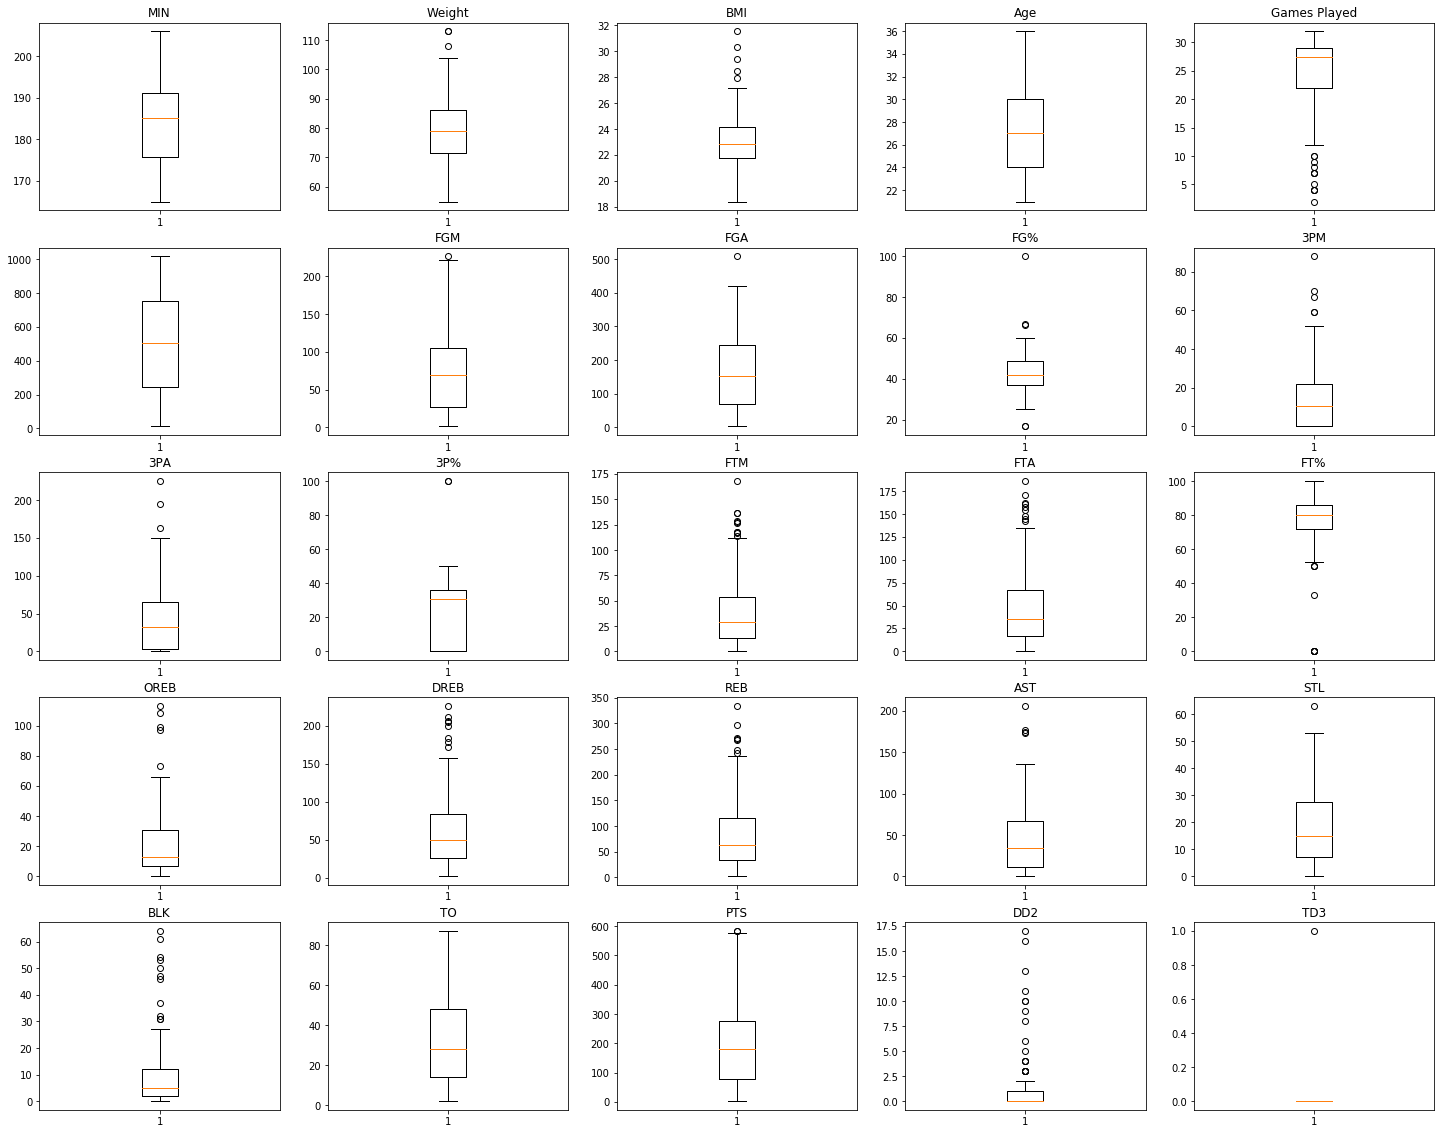

In [30]:
fig, axs = plt.subplots(5,5, figsize = (25,20))

axs[0][0].boxplot(wnba.Height)
axs[0][0].set_title("Height")

axs[0][1].boxplot(wnba.Weight)
axs[0][1].set_title("Weight")

axs[0][2].boxplot(wnba.BMI)
axs[0][2].set_title("BMI")

axs[0][3].boxplot(wnba.Age)
axs[0][3].set_title("Age")

axs[0][4].boxplot(wnba["Games Played"])
axs[0][4].set_title("Games Played")
#####
axs[1][0].boxplot(wnba.MIN)
axs[0][0].set_title("MIN")

axs[1][1].boxplot(wnba.FGM)
axs[1][1].set_title("FGM")

axs[1][2].boxplot(wnba.FGA)
axs[1][2].set_title("FGA")

axs[1][3].boxplot(wnba["FG%"])
axs[1][3].set_title("FG%")

axs[1][4].boxplot(wnba["3PM"])
axs[1][4].set_title("3PM")
#####
axs[2][0].boxplot(wnba["3PA"])
axs[2][0].set_title("3PA")

axs[2][1].boxplot(wnba["3P%"])
axs[2][1].set_title("3P%")

axs[2][2].boxplot(wnba.FTM)
axs[2][2].set_title("FTM")

axs[2][3].boxplot(wnba.FTA)
axs[2][3].set_title("FTA")

axs[2][4].boxplot(wnba["FT%"])
axs[2][4].set_title("FT%")
#####
axs[3][0].boxplot(wnba.OREB)
axs[3][0].set_title("OREB")

axs[3][1].boxplot(wnba.DREB)
axs[3][1].set_title("DREB")

axs[3][2].boxplot(wnba.REB)
axs[3][2].set_title("REB")

axs[3][3].boxplot(wnba.AST)
axs[3][3].set_title("AST")

axs[3][4].boxplot(wnba.STL)
axs[3][4].set_title("STL")
#####
axs[4][0].boxplot(wnba.BLK)
axs[4][0].set_title("BLK")

axs[4][1].boxplot(wnba.TO)
axs[4][1].set_title("TO")

axs[4][2].boxplot(wnba.PTS)
axs[4][2].set_title("PTS")

axs[4][3].boxplot(wnba.DD2)
axs[4][3].set_title("DD2")

axs[4][4].boxplot(wnba.TD3)
axs[4][4].set_title("TD3")


plt.show()


**Comment on your result. What do you see?**

In [20]:
#your answer here
# Most attributes have outlies, some simply have one or two, and some have a pretty continuous dristribution for them

**Now we can save the cleaned data to a new .csv file called `wnba_clean.csv` in the data folder.**

In [21]:
#your code here
wnba.to_csv(path_data+"/wnba_clean.csv", index = False)